# Exercise 8
This question involves the use of simple linear regression on the Auto
 data set.

mpg: Miles per gallon; a measure of fuel efficiency for the vehicle.

cylinders: The number of cylinders in the engine; affects power and efficiency.

displacement: The total volume of all the cylinders in the engine, indicates engine size.

horsepower: A measure of the engine's power output; indicates how much work the engine can perform.

weight: The weight of the vehicle, affects performance and fuel economy.

acceleration: The time it takes for the vehicle to accelerate from 0 to 60 mph; indicates performance capabilities.

year: The model year of the vehicle; indicates when the car was manufactured.

origin: A categorical variable indicating the region of origin for the vehicle (e.g., 1 for American, 2 for European, 3 for Asian).

name: The name or model of the vehicle.

Target Variable

The target variable for this dataset is mpg (Miles per gallon)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

auto = pd.read_csv("Auto.csv")
auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
year,int64
origin,int64
name,object


In [4]:
import pandas as pd

# Check for duplicates
duplicates = auto.duplicated().sum()

# Remove duplicates
if duplicates > 0:
    auto = auto.drop_duplicates()

# Ensure the 'horsepower' and 'mpg' columns are numeric
# Convert non-numeric values to NaN (e.g., strings or mixed types)
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto['mpg'] = pd.to_numeric(auto['mpg'], errors='coerce')

# Handle missing values by dropping rows with NaN
auto = auto.dropna()

# Save the cleaned data to CSV
auto.to_csv('Auto-Cleaned.csv', index=False)


 (a) Use the sm.OLS() function to perform a simple linear regression
 with mpg as the response and horsepower as the predictor. Use
 the summarize() function to print the results.



In [5]:
import statsmodels.api as sm

# Add a constant (intercept) to the predictor 'horsepower'
X = sm.add_constant(auto[['horsepower']], prepend=True)

# Define the Ordinary Least Squares (OLS) regression model
# 'mpg' is the dependent variable, and 'X' (which includes horsepower and the constant) is the predictor
model = sm.OLS(auto['mpg'], X)

# Fit the OLS model to estimate the coefficients
result = model.fit()

# Print the detailed summary of the model (R-squared, coefficients, p-values, etc.)
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           7.03e-81
Time:                        04:45:10   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

 i. Is there a relationship between the predictor and the response?

 The p-value 0.000 gives a very strong evidence of a relationship between “mpg” and “horsepower"


 ii. How strong is the relationship between the predictor and
 the response?

 The R^{2} value indicates that 60.6% of the variation in the response variable ( mpg) is due to the predictor variable (horsepower).


 iii. Is the relationship between the predictor and the response
 positive or negative?

 The regression coefficient for ‘horsepower’ is negative. Hence, the relationship is negative.

 iv. What is the predicted mpg associated with a horsepower of
 98? What are the associated 95% confidence and prediction
 intervals?


In [6]:
import numpy as np
import statsmodels.api as sm

# Assuming the model has already been fitted to data (result is the fitted model)
# Predict for horsepower = 98
hp_value = 98

# Predict for a new data point (intercept term included)
new_data = np.array([1, hp_value])  # Add the intercept (constant term)
prediction = result.predict([new_data])

print("Prediction for horsepower 98: " + str(prediction))


# Calculate the 95% prediction interval and Confidence interval
predicted_value = result.get_prediction([new_data])
prediction_interval = predicted_value.summary_frame(alpha=0.05)


# Print the 95% confidence interval and prediction interval
print("95% Confidence Interval: \n" + str(prediction_interval[['mean_ci_lower', 'mean_ci_upper']]))
print("95% Prediction Interval: \n" + str(prediction_interval[['obs_ci_lower', 'obs_ci_upper']]))


Prediction for horsepower 98: [24.46707715]
95% Confidence Interval: 
   mean_ci_lower  mean_ci_upper
0      23.973079      24.961075
95% Prediction Interval: 
   obs_ci_lower  obs_ci_upper
0     14.809396     34.124758


Plugging in a horsepower value of 98 gives a predicted mpg of 24.46708. The 95% confidence interval for this prediction is (23.97308, 24.96108) and the 95% prediction interval is (14.8094, 34.12467)

CI is the range where you expect average mpg of all cars with horsepower 98 are expected to fall

PI is the range where you expect the mpg of one single car with horsepower 98 to fall

(b) Plot the response and the predictor in a new set of axes ax. Use
 the ax.axline() method or the abline() function defined in the
 lab to display the least squares regression line.

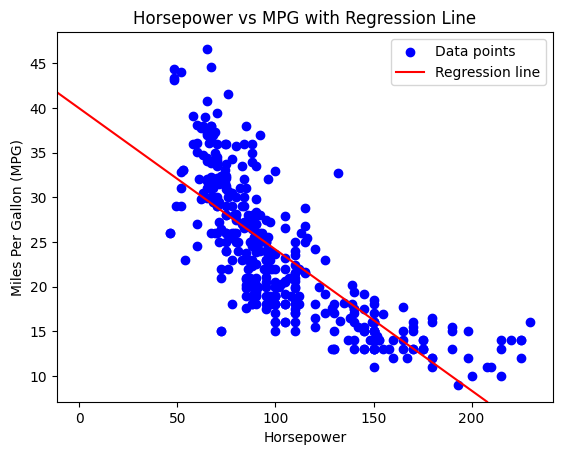

In [7]:
import matplotlib.pyplot as plt

# Extract the coefficients
intercept, slope = result.params

# Plot the data points (scatter plot)
fig, ax = plt.subplots()
ax.scatter(auto['horsepower'], auto['mpg'], color='blue', label='Data points')

# Plot the least squares regression line using ax.axline()
# Slope is the coefficient for 'horsepower', intercept is the constant term
ax.axline((0, intercept), slope=slope, color='red', label='Regression line')

# Add labels and title
ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles Per Gallon (MPG)')
ax.set_title('Horsepower vs MPG with Regression Line')

# Add legend
ax.legend()

# Show the plot
plt.show()

(c) Produce some of diagnostic plots of the least squares regression
 f
 it as described in the lab. Comment on any problems you see
 with the fit.

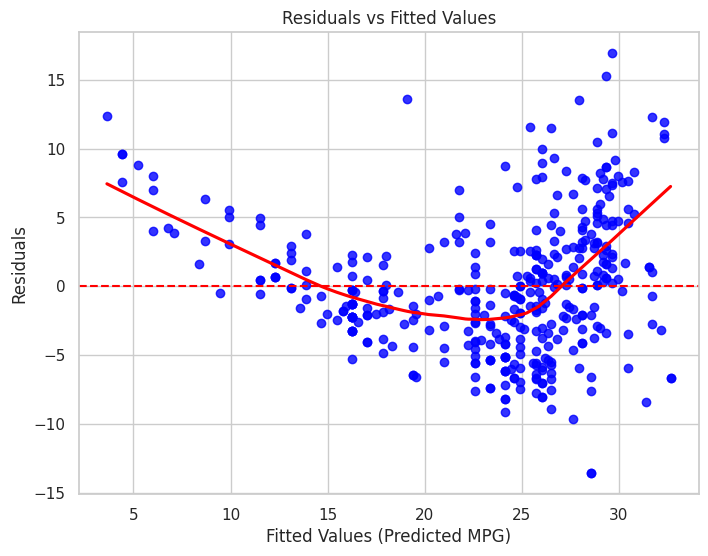

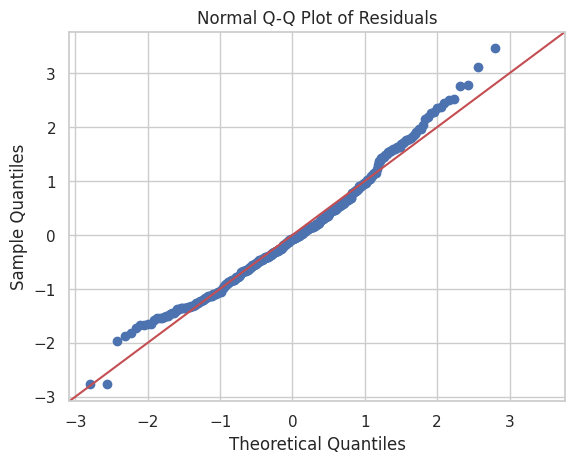

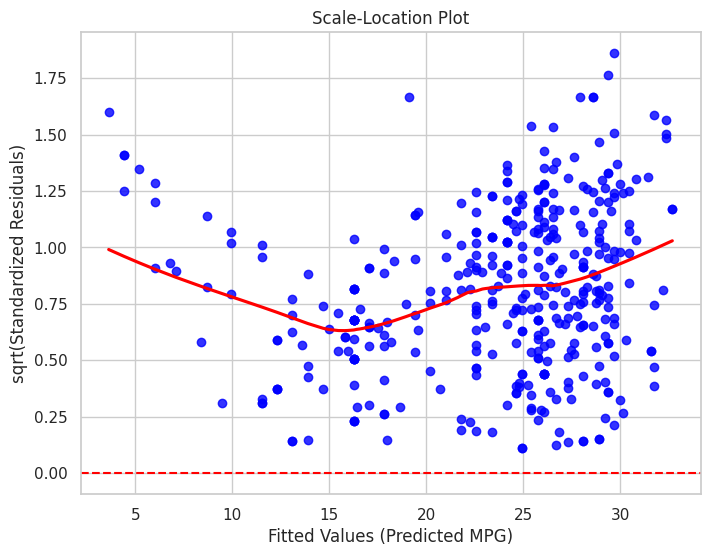

In [32]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'result' contains the fitted OLS model from previous code

# Get the fitted values and residuals
fitted_values = result.fittedvalues  # Predicted y values (mpg)
residuals = result.resid  # Residuals (differences between actual and predicted y)
standardized_residuals = result.get_influence().resid_studentized_internal  # Standardized residuals
leverage = result.get_influence().hat_matrix_diag  # Leverage values

# --- Plot 1: Residuals vs Fitted Values with fitted line ---
plt.figure(figsize=(8, 6))
sns.regplot(x=fitted_values, y=residuals, lowess=True, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted MPG)')
plt.ylabel('Residuals')
plt.show()

# --- Plot 2: Normal Q-Q Plot (no need to add line manually, built-in) ---
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

# --- Plot 3: Scale-Location Plot (Spread-Location Plot) ---
plt.figure(figsize=(8, 6))
sns.regplot(x=fitted_values, y=np.sqrt(np.abs(standardized_residuals)), lowess=True,
            scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values (Predicted MPG)')
plt.ylabel('sqrt(Standardized Residuals)')
plt.show()




Non-linearity of the data: The residual plot(plot 1) exhibits a discernable pattern, in this case u-shaped, that suggests our linear model is not providing a optimal fit to our data - the relationship is non-linear. A discernable pattern in this plot suggests that our model is failing to account for some of the reducible variance in the responses.

The plot2 shows that our studentised residuals have a slightly non-normal distribution

Heteroscedasticity – Non-constant variance of error terms:  Ideally, the red line (representing a smooth trend) should be flat, and the points should be randomly scattered, without any clear patterns. In this case, we observe a slight curve in the red line, which indicates heteroscedasticity (non-constant variance). Specifically, the variance is smaller in the middle (around fitted values of 15-20) and increases toward the ends of the range.



# Exercise 14
This problem focuses on the collinearity problem


 (a) Perform the following commands in Python:

 rng = np.random.default_rng(10)

 x1 = rng.uniform(0, 1, size=100)

 x2 = 0.5 * x1 + rng.normal(size=100) / 10

 y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

 The last line corresponds to creating a linear model in which y is
 a function of x1 and x2. Write out the form of the linear model.
 What are the regression coefficients?


In [10]:
import numpy as np  # Import the NumPy library for numerical operations

# Set the random seed for reproducibility (ensures same random results every run)
rng = np.random.default_rng(10)

# Generate 100 random values uniformly distributed between 0 and 1
x1 = rng.uniform(0, 1, size=100)

# Create a second variable x2 that is linearly related to x1 with added Gaussian noise
x2 = 0.5 * x1 + rng.normal(size=100) / 10  # Noise helps model realistic variations

# Generate the dependent variable y as a linear combination of x1, x2, and random noise
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)  # Linear model with added noise


The linear model for y based on the above code is:


y = B0 + B1 . x1 + B2 . x2 + e

B0 is the intercept, its value is 2

B1 is the coefficient of x1, its value is 2

B2 is the coefficient of x2, its value is 0.3

ϵ is the random noise added to the model: rng.normal(size=100)

(b) What is the correlation between x1 and x2? Create a scatterplot
 displaying the relationship between the variables.

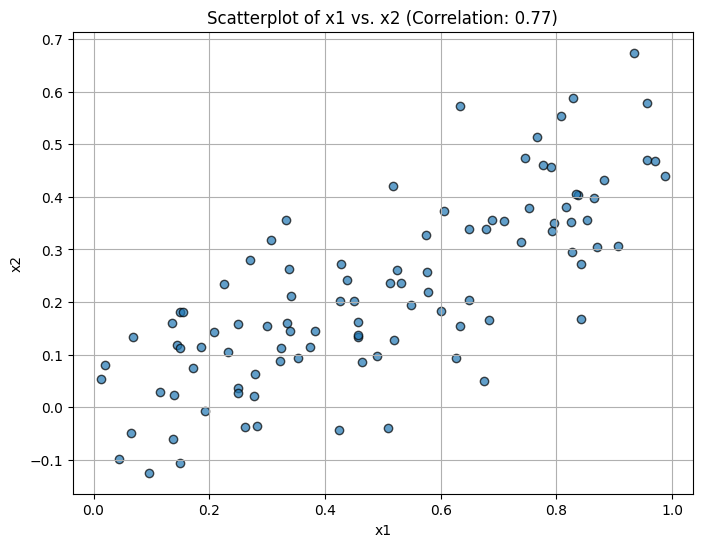

0.772324497691354

In [11]:

# Calculate the correlation between x1 and x2
correlation = np.corrcoef(x1, x2)[0, 1]

# Create a scatterplot to visualize the relationship between x1 and x2
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, alpha=0.7, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Scatterplot of x1 vs. x2 (Correlation: {correlation:.2f})')
plt.grid(True)
plt.show()

correlation


The correlation between x1 and x2 is approximately 0.77, indicating a strong positive linear relationship between the two variables.

The scatterplot above shows how x1 and x2 are related, with a clear positive trend. Some variation around the trendline is due to the noise added during the generation of x2

 (c) Using this data, fit a least squares regression to predict y using
 x1 and x2. Describe the results obtained. What are ˆ β0, ˆ β1, and
 ˆ
 β2? How do these relate to the true β0, β1, and β2? Can you
 reject the null hypothesis H0 : β1 = 0? How about the null
 hypothesis H0 : β2 = 0?

In [12]:
import numpy as np
import statsmodels.api as sm

# Prepare the data for regression (add a constant term for the intercept)
X = sm.add_constant(np.column_stack((x1, x2)))

# Fit the least squares regression model
model = sm.OLS(y, X).fit()

# Extract the estimated coefficients
coefficients = model.params  # β̂0, β̂1, β̂2
p_values = model.pvalues     # p-values for hypothesis tests

# Print the estimated coefficients and their p-values
print("Estimated Coefficients:")
print(f"β̂0 (intercept): {coefficients[0]:.4f}")
print(f"β̂1 (x1 coefficient): {coefficients[1]:.4f}")
print(f"β̂2 (x2 coefficient): {coefficients[2]:.4f}")

print("\nP-values for Hypothesis Tests:")
print(f"P-value for H0: β1 = 0: {p_values[1]:.4f}")
print(f"P-value for H0: β2 = 0: {p_values[2]:.4f}")

# Display the model summary
print("\nModel Summary with both x1 and x2:")
print(model.summary())


Estimated Coefficients:
β̂0 (intercept): 1.9579
β̂1 (x1 coefficient): 1.6154
β̂2 (x2 coefficient): 0.9428

P-values for Hypothesis Tests:
P-value for H0: β1 = 0: 0.0028
P-value for H0: β2 = 0: 0.2594

Model Summary with both x1 and x2:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        04:45:22   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                


Relation to True Coefficients:

Comparison:

The (estimated intercept) B^0 ≈ 1.96 is close to the true value of 2

The (estimated coefficient for x1) B^1 ≈ 1.62 is less than true value of 2

The (estimated coefficient for x2) B^2 ≈ 0.94 is greater than true value of 0.3

The intercept B0 is estimated fairly accurately and B1 and B2 are not well estimated, but more deviation in B2 is likely due to the added noise in the data.

Hypothesis Testing:

null hypothesis H0 : β1 = 0 (testing x1 has no effect on y)

P-value:
0.0028

Since this p-value is less than 0.05, we can reject the null hypothesis

This suggests that x1 has a statistically significant effect on y.

null hypothesis H0 : β2 = 0 (testing if x2 has no effect on y)

P-value:
0.2594

Since this p-value is greater than 0.05, we cannot reject the null hypothesis

This suggests that x2 has no statistically significant effect on y.


 (d) Now fit a least squares regression to predict y using only x1.
 Comment on your results. Can you reject the null hypothesis
 H0 : β1 =0?

In [13]:
import numpy as np
import statsmodels.api as sm

# Prepare the data for regression using only x1 (add a constant term for the intercept)
X_single = sm.add_constant(x1)

# Fit the least squares regression model
model_single = sm.OLS(y, X_single).fit()

# Extract the estimated coefficients and p-values
coefficients_single = model_single.params  # β̂0, β̂1
p_values_single = model_single.pvalues     # p-values for hypothesis tests

# Print the estimated coefficients and their p-values
print("Estimated Coefficients using only x1:")
print(f"β̂0 (intercept): {coefficients_single[0]:.4f}")
print(f"β̂1 (x1 coefficient): {coefficients_single[1]:.4f}")

print("\nP-values for Hypothesis Tests:")
print(f"P-value for H0: β1 = 0: {p_values_single[1]:.4f}")

# Display the model summary
print("\nModel Summary with only x1:")
print(model_single.summary())


Estimated Coefficients using only x1:
β̂0 (intercept): 1.9371
β̂1 (x1 coefficient): 2.0771

P-values for Hypothesis Tests:
P-value for H0: β1 = 0: 0.0000

Model Summary with only x1:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        04:45:22   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    st

The regression analysis reveals that x1 is a significant predictor of y, Here the values of  B^0 =  1.9371 and  B^1 = 2.0771 are much closer to the actual values of  B0 and  B1. Moreover, since the standard error for  B^1 has decreased substantially, dropping from 0.527 in Part c to 0.335 and t statistic value increased substantially from 3.065 to 6.196 , the p-value has reduced dramatically to essentially zero. This provides much stronger evidence for rejecting the null hypothesis  H0:β1=0

 (e) Now fit a least squares regression to predict y using only x2.
 Comment on your results. Can you reject the null hypothesis
 H0 : β1 =0?

In [14]:
import numpy as np
import statsmodels.api as sm

# Prepare the data for regression using only x2 (add a constant term for the intercept)
X_single_x2 = sm.add_constant(x2)

# Fit the least squares regression model
model_single_x2 = sm.OLS(y, X_single_x2).fit()

# Extract the estimated coefficients and p-values
coefficients_single_x2 = model_single_x2.params  # β̂0, β̂2
p_values_single_x2 = model_single_x2.pvalues     # p-values for hypothesis tests

# Print the estimated coefficients and their p-values
print("Estimated Coefficients using only x2:")
print(f"β̂0 (intercept): {coefficients_single_x2[0]:.4f}")
print(f"β̂2 (x2 coefficient): {coefficients_single_x2[1]:.4f}")

print("\nP-values for Hypothesis Tests:")
print(f"P-value for H0: β2 = 0: {p_values_single_x2[1]:.4f}")

# Display the model summary
print("\nModel Summary with only x2:")
print(model_single_x2.summary())


Estimated Coefficients using only x2:
β̂0 (intercept): 2.3239
β̂2 (x2 coefficient): 2.9103

P-values for Hypothesis Tests:
P-value for H0: β2 = 0: 0.0000

Model Summary with only x2:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        04:45:22   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    st

The regression analysis reveals that x2 is a significant predictor of y, Here the values of  B^0 =  2.3239 and  B^2 = 2.9103 are not close to the actual values of  B0 and  B2., it is likely due to the added noise in x2. Moreover, since the standard error for  B^2  has decreased substantially, dropping from 0.831 in Part c to 0.550 and t statistics value increased substantially from 1.134 to 5.291, the p-value has reduced dramatically to essentially zero. This provides much stronger evidence for rejecting the null hypothesis  H0:β2=0

(f) Do the results obtained in (c)–(e) contradict each other? Explain
 your answer.

The contradiction in results is due to the following reason:

As the predictors “x1” and “x2” are highly correlated we are in the presence of collinearity, So we fail to detect the overlap between x1 and x2 in simple linear regression models which is captured in multiple regression model with both x1 and x2

 (g) Suppose we obtain one additional observation, which was unfor
tunately mismeasured. We use the function np.concatenate() to np.conca
add this additional observation to each of x1, x2 and y.


 x1 = np.concatenate([x1, [0.1]])
 tenate()


 x2 = np.concatenate([x2, [0.8]])


 y = np.concatenate([y, [6]])


 Re-fit the linear models from (c) to (e) using this new data. What
 effect does this new observation have on the each of the models?
 In each model, is this observation an outlier? A high-leverage
 point? Both? Explain your answers.

In [34]:
import numpy as np
import statsmodels.api as sm

# Add the mismeasured observation to the data
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

# Re-fit the model using both x1 and x2
X_both = sm.add_constant(np.column_stack((x1, x2)))
model_both = sm.OLS(y, X_both).fit()

# Prepare the data for regression using only x1 (add a constant term for the intercept)
X_single = sm.add_constant(x1)

# Fit the model
model_single = sm.OLS(y, X_single).fit()

# Prepare the data for regression using only x2 (add a constant term for the intercept)
X_single_x2 = sm.add_constant(x2)

# Fit the model
model_single_x2 = sm.OLS(y, X_single_x2).fit()

# Display the results
print("Model with both x1 and x2:")
print(model_both.summary())


print("Model with x1:")
print(model_single.summary())

print("Model with x2:")
print(model_single_x2.summary())

Model with both x1 and x2:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     26.50
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           5.81e-10
Time:                        05:48:27   Log-Likelihood:                -139.82
No. Observations:                 103   AIC:                             285.6
Df Residuals:                     100   BIC:                             293.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1417    

In [16]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Calculate the studentized residuals and leverage
# Influence measures after adding the new observation
influence_after = OLSInfluence(model_both)

# Get the leverage and studentized residuals
leverage_after = influence_after.hat_matrix_diag[-1]  # Leverage of the newly added point
studentized_residual_after = influence_after.resid_studentized_external[-1]  # Studentized residual of the new point

leverage_after, studentized_residual_after  # Return both values

(0.34767161961426646, 2.783730622824801)

In this model, the new observation has a studentized residual of 2.78. This depicts an outlier. The leverage value of this new observation is 0.35, which is quite high compared to the average value of  (p+1)/n=3/101=0.03
 . Thus, I would consider the new observation to be one with high leverage and also large studentized residual.

In [35]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Calculate the studentized residuals and leverage
# Influence measures after adding the new observation
influence_after = OLSInfluence(model_single)

# Get the leverage and studentized residuals
leverage_after = influence_after.hat_matrix_diag[-1]  # Leverage of the newly added point
studentized_residual_after = influence_after.resid_studentized_external[-1]  # Studentized residual of the new point

leverage_after, studentized_residual_after  # Return both values

(0.028553978102489316, 3.4279829109070907)

In this model, the new observation has a studentized residual of 3.43. This depicts a strong outlier. The leverage value of this new observation is 0.03, which is high compared to the average value of (p+1)/n=2/101=0.02
 . Thus, I would consider the new observation to be one with high leverage and also quite large studentized residual ( strong outlier).

In [36]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Calculate the studentized residuals and leverage
# Influence measures after adding the new observation
influence_after = OLSInfluence(model_single_x2)

# Get the leverage and studentized residuals
leverage_after = influence_after.hat_matrix_diag[-1]  # Leverage of the newly added point
studentized_residual_after = influence_after.resid_studentized_external[-1]  # Studentized residual of the new point

leverage_after, studentized_residual_after  # Return both values

(0.09030271829216699, 1.0833402382559727)

In this model, the new observation has a studentized residual of 1.08. This depicts that it is not an outlier. The leverage value of this new observation is 0.09, which is  quite high compared to the average value of (p+1)/n=2/101=0.02
 . Thus, I would consider the new observation to be one with high leverage and low studentized residual (not an outlier).

# Exercise 15
This problem involves the Boston data set, which we saw in the lab
 for this chapter. We will now try to predict per capita crime rate
 using the other variables in this data set. In other words, per capita
 crime rate is the response, and the other variables are the predictors

crim: per capita crime rate by town.

zn: proportion of residential land zoned for lots over 25,000 sq.ft.

indus: proportion of non-retail business acres per town.

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox: nitrogen oxides concentration (parts per 10 million).

rm: average number of rooms per dwelling.

age: proportion of owner-occupied units built prior to 1940.

dis: weighted mean of distances to five Boston employment centres.

rad: index of accessibility to radial highways.

tax: full-value property-tax rate per $10,000.

ptratio: pupil-teacher ratio by town.

lstat: lower status of the population (percent).

medv: median value of owner-occupied homes in $1000s.

Target Variable:

The target variable in this dataset is per capita crime rate

In [17]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 8.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=5b800fa49662a9a25e441268a77257e637aa288ccf4bf002a8b6b71e73598990
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [18]:
from ISLP import load_data

# Load the Boston housing dataset
boston_df = load_data('Boston')

# Display the first few rows of the dataset
print(boston_df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [19]:
boston_df.dtypes


,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


In [20]:
import statsmodels.api as sm
import pandas as pd

# Check for duplicates
duplicates = boston_df.duplicated().sum()

# Remove duplicates
if duplicates > 0:
    boston_df = boston_df.drop_duplicates()

# Handle missing values by dropping rows with NaN
boston_df = boston_df.dropna()

# Save the cleaned data to CSV
boston_df.to_csv('Boston-Cleaned.csv', index=False)


 (a) For each predictor, fit a simple linear regression model to predict
 the response. Describe your results. In which of the models is
 there a statistically significant association between the predictor
 and the response? Create some plots to back up your assertions

In [21]:
models_a = [smf.ols(formula='crim ~ {}'.format(f), data=boston_df).fit()
            for f in boston_df.columns[1:]]

for model in models_a:
    dp = 4
    display(pd.DataFrame({'coef':    np.around(model.params, dp),
                          'std_err': np.around(model.bse, dp),
                          't':       np.around(model.params / model.bse, dp),
                          'P>|t|':   np.around(model.pvalues, dp),
                          'r_squared': np.around(model.rsquared, dp)
                         }))

,coef,std_err,t,P>|t|,r_squared
Intercept,4.4537,0.4172,10.6747,0.0,0.0402
zn,-0.0739,0.0161,-4.5938,0.0,0.0402


,coef,std_err,t,P>|t|,r_squared
Intercept,-2.0637,0.6672,-3.0930,0.0021,0.1653
indus,0.5098,0.0510,9.9908,0.0000,0.1653


,coef,std_err,t,P>|t|,r_squared
Intercept,3.7444,0.3961,9.4530,0.0000,0.0031
chas,-1.8928,1.5061,-1.2567,0.2094,0.0031


,coef,std_err,t,P>|t|,r_squared
Intercept,-13.7199,1.6995,-8.073,0.0,0.1772
nox,31.2485,2.9992,10.419,0.0,0.1772


,coef,std_err,t,P>|t|,r_squared
Intercept,20.4818,3.3645,6.0877,0.0,0.0481
rm,-2.6841,0.5320,-5.0448,0.0,0.0481


,coef,std_err,t,P>|t|,r_squared
Intercept,-3.7779,0.9440,-4.0021,0.0001,0.1244
age,0.1078,0.0127,8.4628,0.0000,0.1244


,coef,std_err,t,P>|t|,r_squared
Intercept,9.4993,0.7304,13.0056,0.0,0.1441
dis,-1.5509,0.1683,-9.2135,0.0,0.1441


,coef,std_err,t,P>|t|,r_squared
Intercept,-2.2872,0.4435,-5.1573,0.0,0.3913
rad,0.6179,0.0343,17.9982,0.0,0.3913


,coef,std_err,t,P>|t|,r_squared
Intercept,-8.5284,0.8158,-10.4539,0.0,0.3396
tax,0.0297,0.0018,16.0994,0.0,0.3396


,coef,std_err,t,P>|t|,r_squared
Intercept,-17.6469,3.1473,-5.6071,0.0,0.0841
ptratio,1.1520,0.1694,6.8014,0.0,0.0841


,coef,std_err,t,P>|t|,r_squared
Intercept,-3.3305,0.6938,-4.8007,0.0,0.2076
lstat,0.5488,0.0478,11.4907,0.0,0.2076


,coef,std_err,t,P>|t|,r_squared
Intercept,11.7965,0.9342,12.6276,0.0,0.1508
medv,-0.3632,0.0384,-9.4597,0.0,0.1508


In [22]:
print('p < 0.05')
for model in models_a:
    if model.pvalues[1] < 0.05:
        print(model.params[1:].index[0])

print('p > 0.05')
for model in models_a:
    if model.pvalues[1] > 0.05:
        print(model.params[1:].index[0])

p < 0.05
zn
indus
nox
rm
age
dis
rad
tax
ptratio
lstat
medv
p > 0.05
chas


<ipython-input-22-a6897dcc9b05>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.pvalues[1] < 0.05:
<ipython-input-22-a6897dcc9b05>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.pvalues[1] > 0.05:


To find which predictors are significant, we have to test H0:β1=0
. All predictors have a p-value less than 0.05 except “chas”, so we may conclude that there is a statistically significant association between each predictor and the response except for the “chas” predictor.

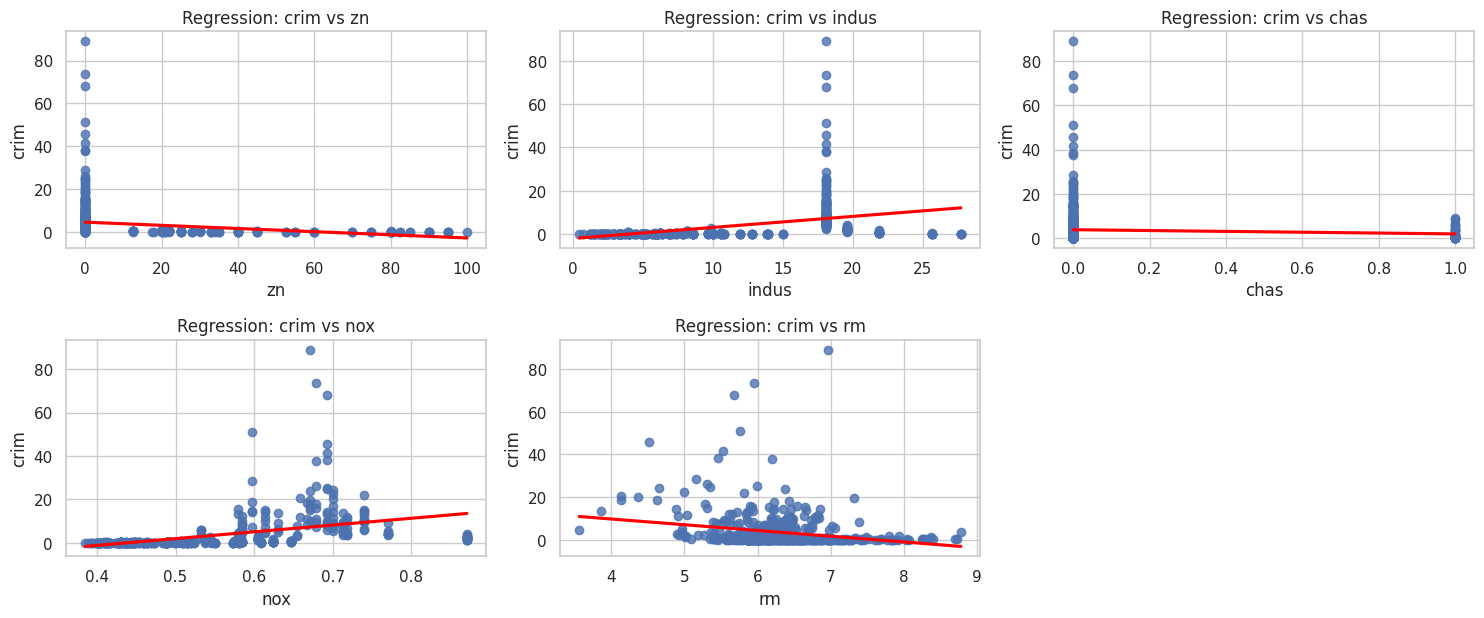

In [23]:
# Set the style for the plots
sns.set(style='whitegrid')

# Create scatter plots with regression lines for each predictor
plt.figure(figsize=(15, 12))

# List of predictors to plot, including the non-significant one for completeness
predictors_to_plot = boston_df.columns[1:-7]  # All predictors except 'crim' and last 5

for i, predictor in enumerate(predictors_to_plot, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns
    sns.regplot(x=boston_df[predictor], y=boston_df['crim'], ci=None, marker='o', line_kws={"color": "red"})
    plt.title(f'Regression: crim vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('crim')

plt.tight_layout()
plt.show()


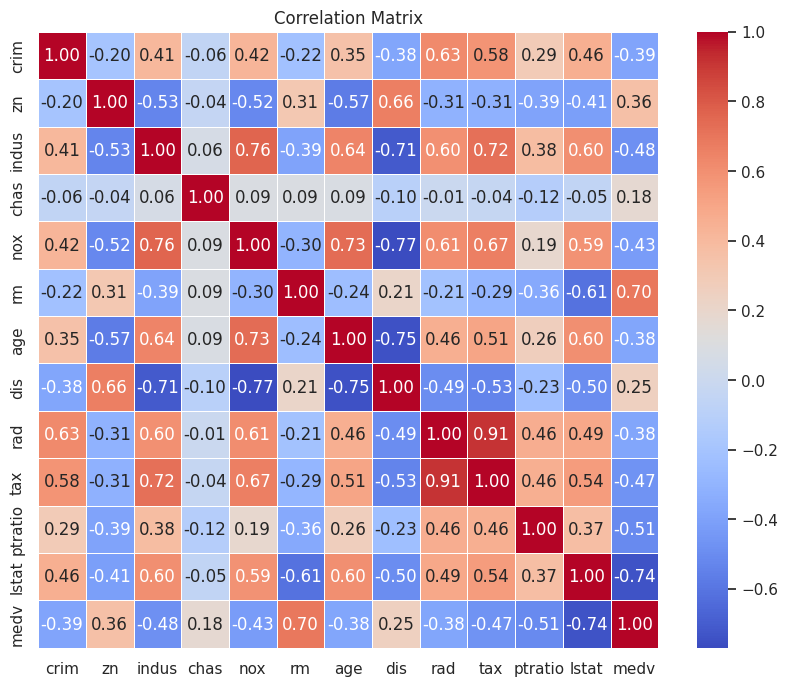

In [24]:
# Plot the correlation matrix for the predictors and the 'crim' variable
plt.figure(figsize=(10, 8))

# Calculate correlation matrix
corr_matrix = boston_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()


 (b) Fit a multiple regression model to predict the response using
 all of the predictors. Describe your results. For which predictors
 can we reject the null hypothesis H0 : βj = 0?

In [25]:
response   = 'crim'
predictors = boston_df.columns.drop(response)
f = '{} ~ {}'.format(response, '+'.join(predictors))

model_b = smf.ols(formula=f, data=boston_df).fit()
print(model_b.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.03e-56
Time:                        04:45:55   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.0

In [26]:
print('p < 0.05')
round(model_b.pvalues[model_b.pvalues < 0.05],4)

p < 0.05


,0
zn,0.0153
dis,0.0004
rad,0.0000
medv,0.0003


When fitting a multiple regression model to predict CRIM using all of the predictors, the R2
  value is 0.449. This is an increase from the largest  R2
  value among all of the individual simple linear regression models, which was 0.3913. That means that the model using all of the predictors does a better job of explaining the variation in CRIM values compared to any of the simple linear regression models.

  Here are the predictors for which H0 can be rejected (p-value < 0.05):

zn (proportion of residential land zoned for large lots): p-value = 0.015

dis (weighted distance to employment centers): p-value = 0.000

rad (index of accessibility to radial highways): p-value = 0.000

medv (median value of owner-occupied homes): p-value = 0.000


 (c) How do your results from (a) compare to your results from (b)?
 Create a plot displaying the univariate regression coefficients
 from (a) on the x-axis, and the multiple regression coefficients
 from (b) on the y-axis. That is, each predictor is displayed as a
 single point in the plot. Its coefficient in a simple linear regres
sion model is shown on the x-axis, and its coefficient estimate
 in the multiple linear regression model is shown on the y-axis.


Compared to Part a, fewer predictors in Part b had p-values that were low enough to provide strong evidence to reject the null hypothesis  H0:βj=0.

,Univariate_coef,Multivariate_coef
zn,-0.073935,0.045710
indus,0.509776,-0.058350
chas,-1.892777,-0.825378
nox,31.248531,-9.957587
rm,-2.684051,0.628911
age,0.107786,-0.000848
dis,-1.550902,-1.012247
rad,0.617911,0.612465
tax,0.029742,-0.003776
ptratio,1.151983,-0.304073


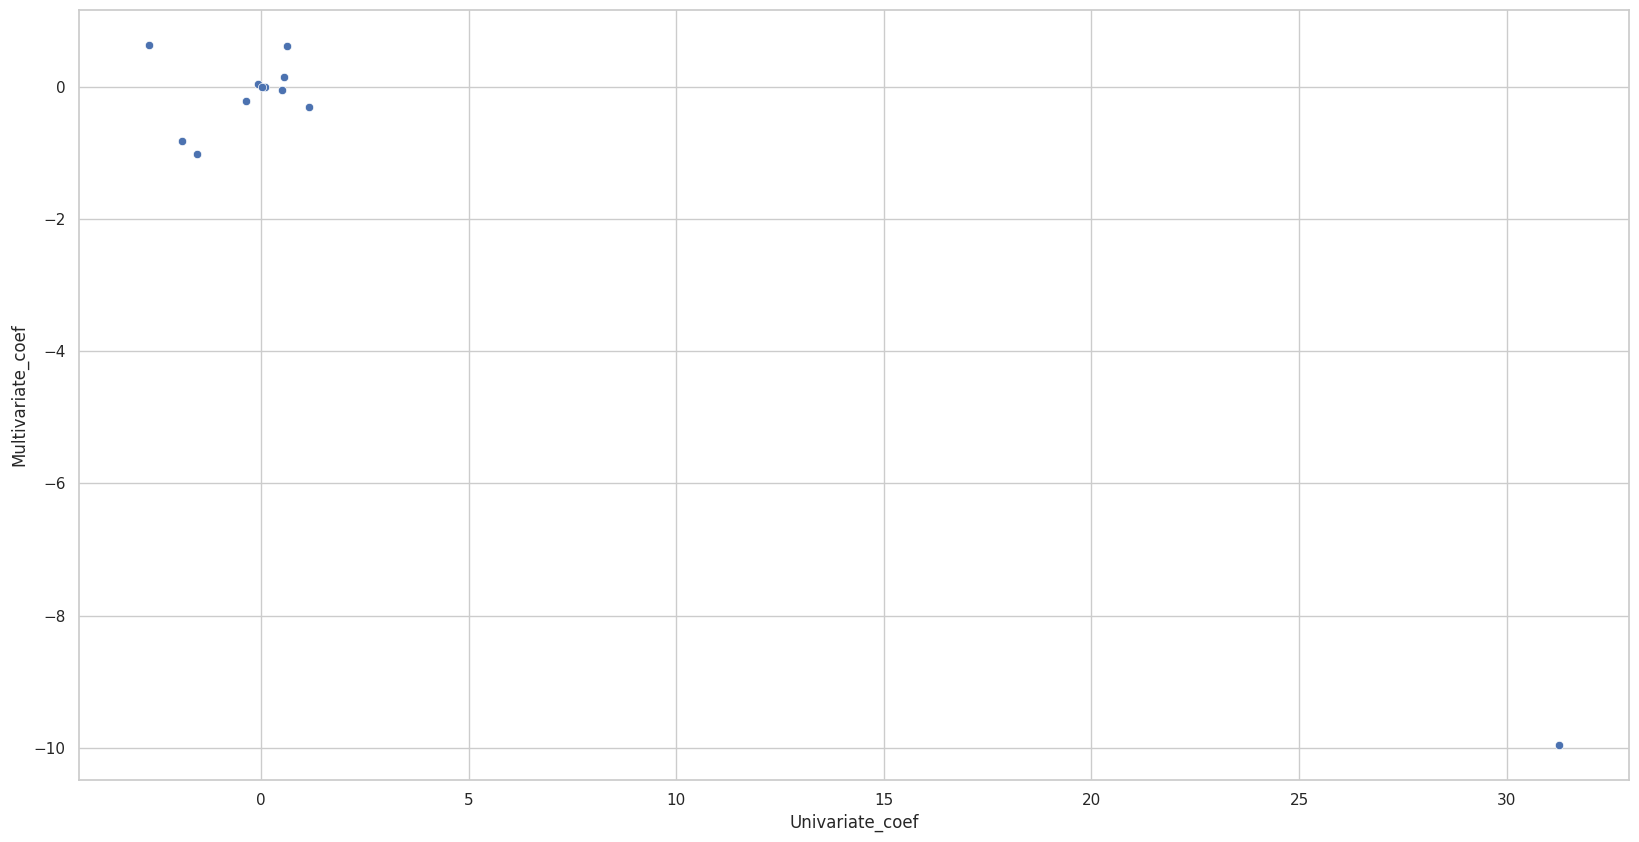

In [27]:
# Get coefficients
univariate_params = pd.concat([m.params[1:] for m in models_a])
multivariate_params = model_b.params[1:]
df = pd.DataFrame({'Univariate_coef': univariate_params,
                   'Multivariate_coef': multivariate_params,})
display(df)

plt.figure(figsize=(20,10))
ax = sns.scatterplot(x='Univariate_coef', y='Multivariate_coef', data=df);

Univariate coefficients reflect direct relationships with the response variable, while multivariate coefficients account for the influence of other variables. Significant changes in sign and magnitude, particularly for nox and rm, indicate that relationships can differ substantially when controlling for confounding factors. This highlights the importance of considering multiple predictors together for a more accurate understanding of crime dynamics.

 (d) Is there evidence of non-linear association between any of the
 predictors and the response? To answer this question, for each
 predictor X, fit a model of the form
 Y =β0+β1X+β2X2+β3X3+ϵ

In [28]:
models_d = [smf.ols(formula='crim ~ {0} + np.power({0}, 2) + np.power({0}, 3)'.format(f), data=boston_df).fit()
            for f in boston_df.columns[1:]]

for model in models_d:
    dp = 4
    display(pd.DataFrame({'coef':    np.around(model.params, dp),
                          'std_err': np.around(model.bse, dp),
                          't':       np.around(model.params / model.bse, dp),
                          'P>|t|':   np.around(model.pvalues, dp),
                          'r_squared': np.around(model.rsquared, dp),
                          }))

,coef,std_err,t,P>|t|,r_squared
Intercept,4.8461,0.4330,11.1922,0.0000,0.0582
zn,-0.3322,0.1098,-3.0252,0.0026,0.0582
"np.power(zn, 2)",0.0065,0.0039,1.6791,0.0938,0.0582
"np.power(zn, 3)",-0.0000,0.0000,-1.2030,0.2295,0.0582


,coef,std_err,t,P>|t|,r_squared
Intercept,3.6626,1.5740,2.3269,0.0204,0.2597
indus,-1.9652,0.4820,-4.0773,0.0001,0.2597
"np.power(indus, 2)",0.2519,0.0393,6.4070,0.0000,0.2597
"np.power(indus, 3)",-0.0070,0.0010,-7.2920,0.0000,0.2597


,coef,std_err,t,P>|t|,r_squared
Intercept,3.7444,0.3961,9.4530,0.0000,0.0031
chas,-0.6309,0.5020,-1.2567,0.2094,0.0031
"np.power(chas, 2)",-0.6309,0.5020,-1.2567,0.2094,0.0031
"np.power(chas, 3)",-0.6309,0.5020,-1.2567,0.2094,0.0031


,coef,std_err,t,P>|t|,r_squared
Intercept,233.0866,33.6431,6.9282,0.0,0.297
nox,-1279.3713,170.3975,-7.5082,0.0,0.297
"np.power(nox, 2)",2248.5441,279.8993,8.0334,0.0,0.297
"np.power(nox, 3)",-1245.7029,149.2816,-8.3446,0.0,0.297


,coef,std_err,t,P>|t|,r_squared
Intercept,112.6246,64.5172,1.7457,0.0815,0.0678
rm,-39.1501,31.3115,-1.2503,0.2118,0.0678
"np.power(rm, 2)",4.5509,5.0099,0.9084,0.3641,0.0678
"np.power(rm, 3)",-0.1745,0.2637,-0.6615,0.5086,0.0678


,coef,std_err,t,P>|t|,r_squared
Intercept,-2.5488,2.7691,-0.9204,0.3578,0.1742
age,0.2737,0.1864,1.4683,0.1427,0.1742
"np.power(age, 2)",-0.0072,0.0036,-1.9878,0.0474,0.1742
"np.power(age, 3)",0.0001,0.0000,2.7237,0.0067,0.1742


,coef,std_err,t,P>|t|,r_squared
Intercept,30.0476,2.4459,12.2850,0.0,0.2778
dis,-15.5544,1.7360,-8.9600,0.0,0.2778
"np.power(dis, 2)",2.4521,0.3464,7.0783,0.0,0.2778
"np.power(dis, 3)",-0.1186,0.0204,-5.8135,0.0,0.2778


,coef,std_err,t,P>|t|,r_squared
Intercept,-0.6055,2.0501,-0.2954,0.7678,0.4
rad,0.5127,1.0436,0.4913,0.6234,0.4
"np.power(rad, 2)",-0.0752,0.1485,-0.5061,0.6130,0.4
"np.power(rad, 3)",0.0032,0.0046,0.7031,0.4823,0.4


,coef,std_err,t,P>|t|,r_squared
Intercept,19.1836,11.7955,1.6263,0.1045,0.3689
tax,-0.1533,0.0957,-1.6023,0.1097,0.3689
"np.power(tax, 2)",0.0004,0.0002,1.4877,0.1375,0.3689
"np.power(tax, 3)",-0.0000,0.0000,-1.1668,0.2439,0.3689


,coef,std_err,t,P>|t|,r_squared
Intercept,477.1840,156.7950,3.0434,0.0025,0.1138
ptratio,-82.3605,27.6439,-2.9793,0.0030,0.1138
"np.power(ptratio, 2)",4.6353,1.6083,2.8821,0.0041,0.1138
"np.power(ptratio, 3)",-0.0848,0.0309,-2.7433,0.0063,0.1138


,coef,std_err,t,P>|t|,r_squared
Intercept,1.2010,2.0286,0.5920,0.5541,0.2179
lstat,-0.4491,0.4649,-0.9660,0.3345,0.2179
"np.power(lstat, 2)",0.0558,0.0301,1.8522,0.0646,0.2179
"np.power(lstat, 3)",-0.0009,0.0006,-1.5170,0.1299,0.2179


,coef,std_err,t,P>|t|,r_squared
Intercept,53.1655,3.3563,15.8405,0.0,0.4202
medv,-5.0948,0.4338,-11.7438,0.0,0.4202
"np.power(medv, 2)",0.1555,0.0172,9.0455,0.0,0.4202
"np.power(medv, 3)",-0.0015,0.0002,-7.3120,0.0,0.4202


Significant non-linear predictors:

indus, nox, age, dis, ptratio, rad, medv have non linear relationship with the crime rate.
mdev and rad have significant non linear relationship with crime rate
